# Dataset 5 - Focusing on SOFA respiration

### To explore on the feature 'sofa_respiration'
### The entire workbook did not complete running before the submission, leading to missing results.

## Data Processing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'Assignment_1_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36489 entries, 0 to 36488
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      36489 non-null  object 
 1   age                         36489 non-null  float64
 2   heart_rate_min              36417 non-null  float64
 3   heart_rate_max              36417 non-null  float64
 4   heart_rate_mean             36417 non-null  float64
 5   mbp_min                     36401 non-null  float64
 6   mbp_max                     36401 non-null  float64
 7   mbp_mean                    36401 non-null  float64
 8   sbp_min                     36343 non-null  float64
 9   sbp_max                     36343 non-null  float64
 10  sbp_mean                    36343 non-null  float64
 11  dbp_min                     36341 non-null  float64
 12  dbp_max                     36341 non-null  float64
 13  dbp_mean                    363

In [4]:
df.head(10)

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
5,F,24.131524,82.0,111.0,95.640000,53.0,113.0,77.520000,86.0,136.0,...,NaN,6000.0,NaN,0.0,NaN,1.0,0.0,0.0,1,False
6,M,68.308897,60.0,80.0,71.083333,63.0,112.0,75.720000,87.0,153.0,...,NaN,2560.0,1.0,1.0,NaN,1.0,1.0,0.0,3,False
7,F,57.433933,62.0,92.0,75.240000,65.0,97.0,78.160000,88.0,125.0,...,NaN,2200.0,NaN,2.0,0.0,3.0,0.0,0.0,4,False
8,M,62.564975,48.0,87.0,59.000000,56.0,86.0,71.954545,104.0,140.0,...,NaN,800.0,NaN,1.0,NaN,1.0,0.0,0.0,4,False
9,M,66.238225,61.0,80.0,69.750000,61.0,92.0,74.958333,93.0,127.0,...,NaN,1925.0,NaN,0.0,NaN,1.0,0.0,2.0,7,False


In [5]:
df['outcome'].value_counts(normalize=True)

False    0.963578
True     0.036422
Name: outcome, dtype: float64

In [6]:
df['gender'].replace({'M':1, 'F':0}, inplace=True)

In [7]:
df_norm = df.copy()
for col in df_norm:
    if df_norm[col].dtype == 'float64' or df_norm[col].dtype == 'int64':
        df_norm[col] = (df_norm[col] - df_norm[col].mean())/df_norm[col].std()

In [8]:
df_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,36489.0,3.875086e-17,1.0,-1.094033,-1.094033,0.914024,0.914024,0.914024
age,36489.0,-5.140817e-17,1.0,-2.851891,-0.616634,0.091196,0.763350,2.200235
heart_rate_min,36417.0,-3.476912e-16,1.0,-4.111428,-0.725898,-0.062068,0.601761,6.111546
heart_rate_max,36417.0,7.804517e-18,1.0,-3.244683,-0.730533,-0.101996,0.574891,9.277717
heart_rate_mean,36417.0,-1.841866e-16,1.0,-3.527194,-0.721902,-0.084843,0.650568,5.625750
mbp_min,36401.0,-3.853222e-16,1.0,-4.465290,-0.556648,-0.032199,0.567171,5.437052
mbp_max,36401.0,5.953560e-16,1.0,-2.333690,-0.620407,-0.149254,0.407563,8.288667
mbp_mean,36401.0,-5.176669e-16,1.0,-3.124648,-0.710890,-0.119387,0.606076,6.146404
sbp_min,36343.0,4.467408e-16,1.0,-5.534193,-0.655478,-0.086793,0.571684,5.360607
sbp_max,36343.0,-4.107669e-16,1.0,-4.318088,-0.686553,-0.074005,0.582296,8.939203


In [9]:
#Dataset 5 was created to with sofa respiration as focus.
df5 = df_norm.dropna(subset=['sofa_respiration'])
df5 = df5.dropna(thresh=len(df5)*0.8, axis=1)
df5 = df5.dropna()
df5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,5847.0,0.183197,0.966227,-1.094033,-1.094033,0.914024,0.914024,0.914024
age,5847.0,0.066630,0.873582,-2.844076,-0.454347,0.134123,0.693970,1.912139
heart_rate_min,5847.0,0.020232,0.927802,-4.111428,-0.659515,-0.062068,0.601761,3.788143
heart_rate_max,5847.0,0.011956,0.900244,-2.132655,-0.633835,-0.101996,0.526542,5.796586
heart_rate_mean,5847.0,0.076423,0.890584,-2.737331,-0.544949,-0.046843,0.613975,4.594828
mbp_min,5847.0,-0.149295,0.851840,-4.452553,-0.556648,-0.107121,0.342407,3.339257
mbp_max,5847.0,-0.045082,1.127298,-1.948202,-0.663239,-0.277750,0.236235,8.245834
mbp_mean,5847.0,-0.207398,0.767866,-2.852982,-0.712894,-0.317822,0.189280,3.740576
sbp_min,5847.0,-0.257588,0.842547,-5.115162,-0.745270,-0.266378,0.212515,3.624622
sbp_max,5847.0,-0.053992,0.914941,-2.874225,-0.686553,-0.205265,0.407283,8.939203


In [10]:
df5['outcome'].value_counts()

False    5454
True      393
Name: outcome, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [12]:
df_list = []
for xy in [df5]:
    X, y = xy.iloc[:, 0:-1], xy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y, shuffle=True)
    
    smote_sampler = SMOTE(random_state=12,sampling_strategy='minority')
    X_s, y_s = smote_sampler.fit_resample(X_train, y_train)
    
    df_list.append([X_s, y_s, X_test, y_test])



print(f'For train data:')
print(y_s.value_counts())
print(y_s.value_counts(normalize=True))
print()
print(f'For test data:')
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

df_list[0][0]

For train data:
False    3817
True     3817
Name: outcome, dtype: int64
False    0.5
True     0.5
Name: outcome, dtype: float64

For test data:
False    1637
True      118
Name: outcome, dtype: int64
False    0.932764
True     0.067236
Name: outcome, dtype: float64


,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_respiration,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
0,0.914024,-0.468181,1.597506,1.348475,1.657195,-0.256963,0.022074,-0.307403,-0.685409,0.801064,...,-1.423770,0.053588,-0.058992,-0.873788,0.469463,1.841003,-0.062088,-0.871209,-0.687885,0.066969
1,-1.094033,-1.877306,1.066442,0.768287,0.895705,0.642092,-0.106422,-0.074337,-0.026932,-0.380279,...,-0.779330,-0.398858,-0.414498,-0.181540,0.469463,0.628932,-0.062088,1.983864,-0.687885,-1.923221
2,0.914024,0.133887,0.867293,0.284796,0.888119,0.791934,0.107738,0.555842,-0.146655,-0.292772,...,0.325425,-0.142472,-0.067880,-0.674875,-1.229876,1.841003,1.994443,0.080482,0.144401,-0.264730
3,0.914024,0.095333,-0.261217,0.091400,0.281162,1.166541,0.321899,0.783235,0.571684,0.451036,...,0.555582,-0.112309,-0.094543,0.667785,0.469463,0.628932,-1.090354,2.935555,-0.687885,-0.596428
4,-1.094033,0.217937,-0.062068,-0.343741,-0.291384,-3.178892,0.064906,-0.783592,-3.738347,-0.205265,...,0.141299,0.053588,6.793387,-1.393171,-1.229876,-0.583139,-0.062088,1.983864,2.641259,1.062063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,-0.622105,0.136742,1.452492,0.824874,1.466156,0.038584,-0.640540,-0.392720,-0.847337,-1.250309,...,1.108176,-0.246926,-0.313455,-0.572192,0.469463,-0.583139,3.022709,2.935555,-0.687885,1.335686
7630,0.914024,-0.965234,-0.442773,0.313328,-0.539588,0.182636,2.449708,0.504588,-1.012849,1.338037,...,-0.538464,0.021124,-0.130450,-1.385232,0.469463,-0.583139,3.022709,1.032173,2.641259,0.723722
7631,0.914024,0.019271,-0.718825,-0.624587,-0.411337,-0.449797,4.926596,-0.236985,-0.554812,-0.080998,...,-0.562882,-0.553032,-0.271543,-1.174441,0.469463,-0.583139,-0.423103,2.601424,2.349051,1.044393
7632,0.914024,0.941932,2.045419,1.372399,1.951436,1.635768,0.354355,1.518317,0.681327,0.233628,...,2.883808,-0.328685,-0.279503,-0.125121,0.469463,0.526881,-1.090354,1.823607,-0.617810,0.259029


In [13]:
#feature selection packages
from sklearn.feature_selection import SequentialFeatureSelector as SFS

#models packages

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from xgboost import XGBClassifier as XGBC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC

#others
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import time

## Model Training

In [14]:
#Running through all models to get a rough idea of the datasets
allrec = []
allXy = []

for i, dataset in enumerate(df_list):
    print(f'For dataset {i+5}:')
    models = {
        'SVM_linear':SVC(kernel='linear',probability=True),
        'AdaBoost':ABC(),
        'SVM_rbf':SVC(kernel='rbf', probability=True)
    }
    
    rec = {}
    Xy_test = pd.concat([dataset[2], dataset[3]],axis=1)
    
    for model in models:
        st = time.time()
        fitted = models[model].fit(dataset[0], dataset[1])
        Xy_test[model] = fitted.predict(dataset[2])
        Xy_test[model+'_ProbTrue'] = fitted.predict_proba(dataset[2])[:,1]
        rec[model] = fitted
        et = time.time()
        print('For {}, F1 score is {:.4f}.'.format(
            model,f1_score(Xy_test['outcome'],Xy_test[model])))
        print(f'Runtime = {et-st}')
    
    allrec.append(rec)
    allXy.append(Xy_test)

For dataset 5:
For SVM_linear, F1 score is 0.2194.
Runtime = 21.136067628860474
For AdaBoost, F1 score is 0.1966.
Runtime = 1.4944183826446533
For SVM_rbf, F1 score is 0.1917.
Runtime = 10.938256978988647


In [15]:
#Creating a function to view contingency table

def ViewResult(result, models):
    for model in models:
        data_crosstab = pd.crosstab(
            index=result['outcome'],
            columns=result[model],
            rownames=['Label'],
            colnames=['Pred']
        )
        print(f' Contingency Table for {model}:')
        print(data_crosstab)
        print('F1 Score:', f1_score(result['outcome'], result[model]))
        print()
        
    plt.figure(0).clear()
    
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_ProbTrue']
        label = result['outcome']
        fpr, tpr, thresh = roc_curve(label, pred_prob)
        auc = roc_auc_score(label, pred_prob)
        plt.plot(fpr,tpr,label=f"{model}, auc="+str(auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    
    plt.figure(1).clear()
    for model in models:
        pred = result[model]
        pred_prob = result[model+'_ProbTrue']
        label = result['outcome']
        pre, rec, thresh = precision_recall_curve(label, pred_prob)
        avgprecision = average_precision_score(label, pred_prob)
        plt.plot(rec,pre,label=f"{model}, avgprec="+str(avgprecision))
        plt.xlabel('Recall')
        plt.ylabel('Precision')

    plt.legend(loc=0)

 Contingency Table for SVM_linear:
Pred   False  True 
Label              
False   1130    507
True      41     77
F1 Score: 0.21937321937321938

 Contingency Table for AdaBoost:
Pred   False  True 
Label              
False   1434    203
True      83     35
F1 Score: 0.19662921348314605

 Contingency Table for SVM_rbf:
Pred   False  True 
Label              
False   1472    165
True      88     30
F1 Score: 0.1916932907348243



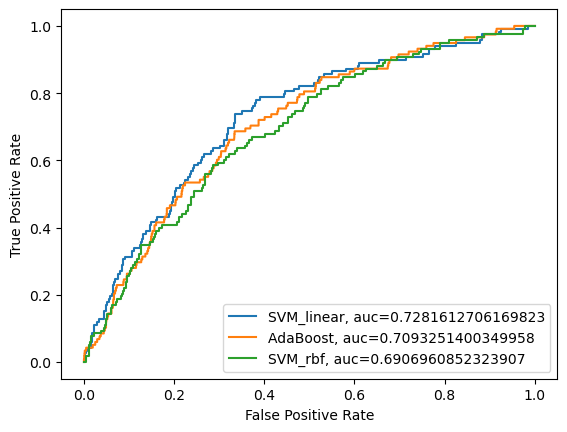

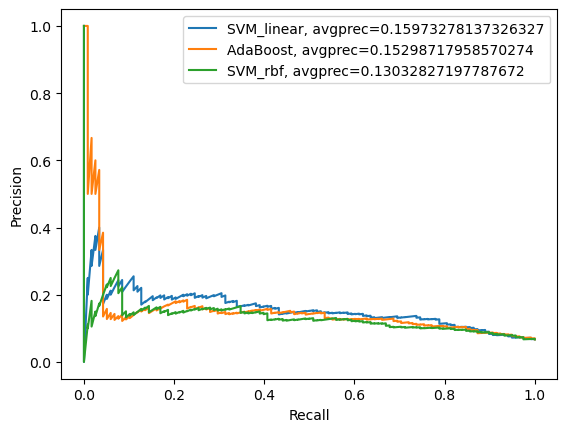

In [16]:
ViewResult(allXy[0], models)

In [17]:
#Function for GridSearchCV for Best Parameters

def GridSearchBP(mod, par, dat):
    rec = {}
    Xy_test = pd.concat([dat[2], dat[3]],axis=1)

    stratifiedCV = StratifiedKFold(n_splits=5)

    for model in mod:
        st = time.time()
        BestParams = GridSearchCV(
            mod[model],
            param_grid = par[model],
            scoring='f1',
            cv=stratifiedCV,
            n_jobs=-1
        )
        BestParams.fit(dat[0], dat[1])
        Xy_test[model] = BestParams.predict(dat[2])
        Xy_test[model+'_ProbTrue'] = BestParams.predict_proba(dat[2])[:,1]
        rec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (rec, Xy_test)

In [18]:
models = {
    'SVM_linear':SVC(kernel='linear', probability=True),
    'AdaBoost':ABC(),
    'SVM_rbf':SVC(kernel='rbf', probability=True)
}
params = {
    'SVM_linear':{
        'C':[0.1,1,10,20]
    },
    'AdaBoost':{
        'n_estimators':[1,10,100,150],
        'learning_rate':[0.1,1,10]
    },
    'SVM_rbf':{
        'C':[0.1,1,10,20]
    }
}

In [19]:
data = df_list[0]
rec5, dfresult5 = GridSearchBP(models, params, data)

For SVM_linear cross validation F1 score is 0.7471
Parameters are {'C': 20}.
Runtime = 309.9579918384552
For AdaBoost cross validation F1 score is 0.9178
Parameters are {'learning_rate': 1, 'n_estimators': 150}.
Runtime = 16.39539098739624
For SVM_rbf cross validation F1 score is 0.9780
Parameters are {'C': 20}.
Runtime = 33.81716322898865


In [20]:
#setting parameters based on an initial GridSearch ran
models_2 = {
    'SVM_linear':SVC(kernel='linear', probability=True, C=20),
    'AdaBoost':ABC(learning_rate=1, n_estimators=150),
    'SVM_rbf':SVC(kernel='rbf', probability=True, C=20)
}

In [ ]:
#Testing of feature selection with auto setting and best parameters from above.

fsrec5={}

for model in models_2:
    feature_selection = SFS(
        models_2[model], n_features_to_select='auto', direction="forward", n_jobs=-1
    ).fit(data[0], data[1])
    
    fsrec5[model] = feature_selection
    print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

SVM_linear 19 Index(['gender', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'mbp_mean',
       'sbp_mean', 'dbp_max', 'dbp_mean', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'wbc_max', 'urineoutput', 'sofa_respiration',
       'sofa_cns'],
      dtype='object')
AdaBoost 19 Index(['gender', 'age', 'heart_rate_max', 'dbp_min', 'lactate_min', 'ph_min',
       'glucose_min', 'wbc_min', 'wbc_max', 'creatinine_min', 'hemoglobin_min',
       'hemoglobin_max', 'pt_max', 'sofa_respiration', 'sofa_coagulation',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charlson_comorbidity_index'],
      dtype='object')


In [21]:
#Creating a function for feature selection and fitting of best hyperparameters

def FeatureSelect_BestParams(models, models2, params, data, n_features):
    fsrec = {}
    bprec = {}
    dfresult = pd.concat([data[2],data[3]],axis=1)
    stratifiedCV = StratifiedKFold(n_splits=5)
    
    for model in models2:
        st = time.time()
        feature_selection = SFS(
            models2[model], n_features_to_select=n_features, direction="forward", n_jobs=-1
        ).fit(data[0], data[1])

        fsrec[model] = feature_selection
        print(model, feature_selection.n_features_to_select_, data[0].columns[feature_selection.support_])

        X = data[0].loc[:,list(data[0].columns[feature_selection.support_])]
        X_test = data[2].loc[:,list(data[0].columns[feature_selection.support_])]

        BestParams = GridSearchCV(
            models[model],
            param_grid = params[model],
            scoring='f1',
            n_jobs=-1
        )
        BestParams.fit(X,data[1])
        dfresult[model] = BestParams.predict(X_test)
        dfresult[model+'_ProbTrue'] = BestParams.predict_proba(X_test)[:,1]
        bprec[model] = BestParams
        et = time.time()
        print('For {} cross validation F1 score is {:.4f}'.format(model,BestParams.best_score_))
        print(f'Best parameters are {BestParams.best_params_}.')
        print(f'Runtime = {et-st}')
    return (fsrec, bprec, dfresult)

In [ ]:
#Training and evaluating models with 10 features
data=df_list[0]

fs_rec5_10, bp_rec5_10, dfresult5_10 = FeatureSelect_BestParams(models, models_2, params, data, 10)

In [ ]:
ViewResult(dfresult5_10, models)

In [ ]:
#Cross-validation f1 score of models is significantly higher than f1 score on test data. 
#There could be possible overfitting.
#Training and testing for 5 features instead to try reduce overfitting.

data=df_list[0]

fs_rec5_5, bp_rec5_5, dfresult5_5 = FeatureSelect_BestParams(models, models_2, params, data, 5)

In [ ]:
ViewResult(dfresult5_5, models)

In [ ]:
data=df_list[0]

fs_rec5_15, bp_rec5_15, dfresult5_15 = FeatureSelect_BestParams(models, models_2, params, data, 15)

In [ ]:
ViewResult(dfresult4_15, models)

In [ ]:
data=df_list[0]

fs_rec5_8, bp_rec5_8, dfresult5_8 = FeatureSelect_BestParams(models, models_2, params, data, 8)

In [ ]:
ViewResult(dfresult5_8, models)